In [77]:
print('hello world')

hello world


# Plaing with IRIS dataset 

In [78]:
import matplotlib.pyplot as plt
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
feature_names = iris.feature_names

In [79]:
y.shape

(150,)

In [80]:
X.shape

(150, 4)

In [81]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [82]:
X[:10,:]# show only 10 first observations in X (features)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [83]:
print(class_names)
print(feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


([], <a list of 0 Text major ticklabel objects>)

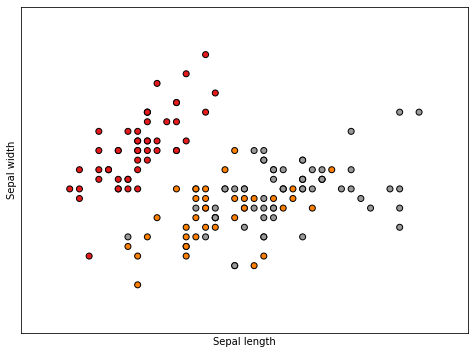

In [84]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


# Decision Tree

Text(0.5, 1.0, 'Training accuracy: 0.96')

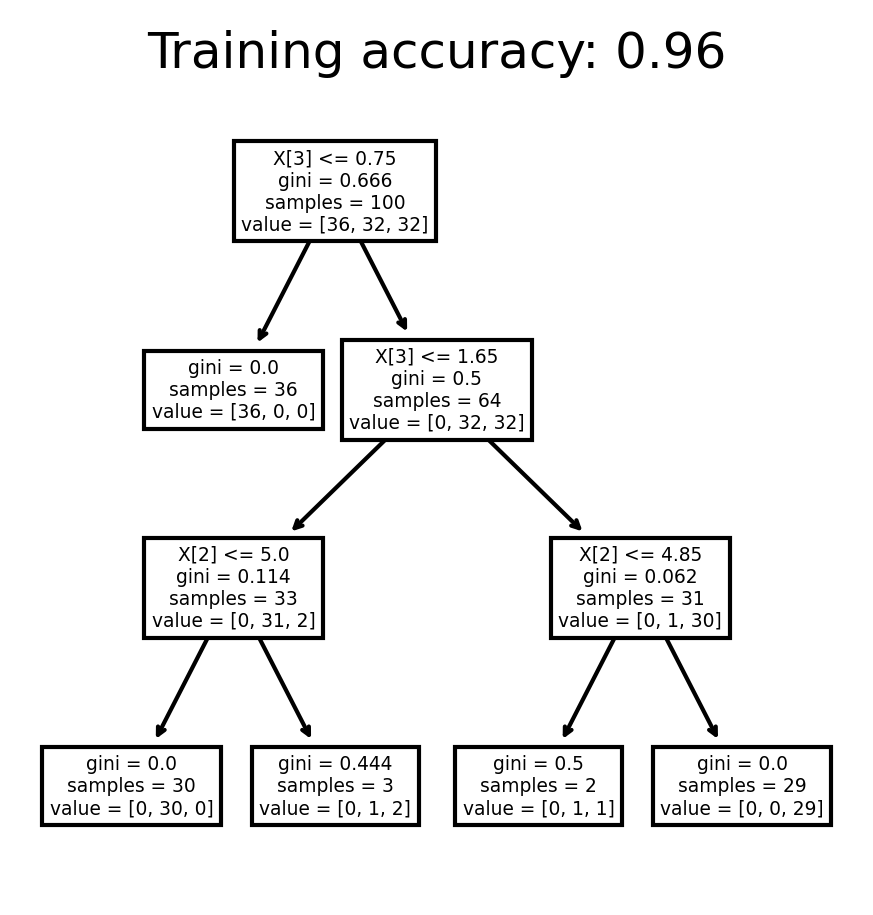

In [85]:
from sklearn import tree
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

clf = tree.DecisionTreeClassifier(max_depth=3, criterion='gini',)

clf = clf.fit(X_train, y_train)
plt.figure(figsize=(3.5,3.5), dpi=300)
tree.plot_tree(clf)
plt.title('Training accuracy: {note:.2f}'.format( note= clf.score(X, y) ) )

In [86]:
importances = clf.feature_importances_
importances

array([0.        , 0.        , 0.05231046, 0.94768954])

<Figure size 1200x1200 with 0 Axes>

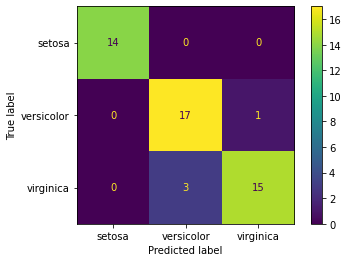

<Figure size 1200x1200 with 0 Axes>

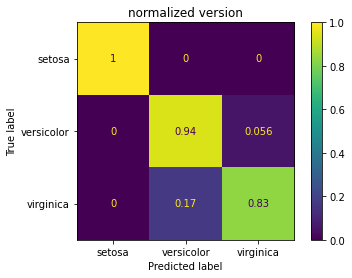

In [87]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

clf = tree.DecisionTreeClassifier(max_depth=3, criterion='gini',)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, normalize=None)
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(4,4), dpi=300)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels = class_names, )
disp.plot()
plt.show()

plt.figure(figsize=(4,4), dpi=300)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized,
                               display_labels = class_names, )
disp.plot()
plt.title('normalized version')
plt.show()


In [88]:
from sklearn import tree
from sklearn import datasets
from sklearn.metrics import classification_report

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

clf = tree.DecisionTreeClassifier(max_depth=3, criterion='gini',)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

report_metrics = classification_report(y_test, y_pred, target_names = class_names)
print(report_metrics)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.85      0.94      0.89        18
   virginica       0.94      0.83      0.88        18

    accuracy                           0.92        50
   macro avg       0.93      0.93      0.93        50
weighted avg       0.92      0.92      0.92        50



# K-Nearest Neighbor

In [89]:
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

######### k=1
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

report_metrics = classification_report(y_test, y_pred, target_names = class_names)
print('k=1 =>  \n', report_metrics)

######### k=5
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

report_metrics = classification_report(y_test, y_pred, target_names = class_names)
print('k=5 =>  \n', report_metrics)


k=1 =>  
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.95      1.00      0.97        18
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

k=5 =>  
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.94      0.94      0.94        18

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



# Naive Bayes (Gaussian)

In [90]:
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

clf = GaussianNB()
clf.fit(X, y)

y_pred = clf.predict(X)

report_metrics = classification_report(y, y_pred, target_names = class_names)
print(report_metrics)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



# Logistic Regression

In [91]:
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

clf = LogisticRegression(C=1e5)
clf.fit(X, y)

y_pred = clf.predict(X)

report_metrics = classification_report(y, y_pred, target_names = class_names)
print(report_metrics)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.98      0.98        50
   virginica       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



# Homework #1

In [92]:
# Homework-1
# Estimated time: 10 Minutes 

# Having hold-out test sets or cross validation is necessary in method's evaluation.
# In this cell, redo the decision tree over Iris dataset but with cross-validation.

### read/load iris data and create X, y, feature_names, class_names
# code here

### create a decision tree classifier object (clf)
## train the model with the X_train and y_train
# code here


### We can simply do the cross-validation for training/evaluting the tree model
## consider 5-fold CV
## hint use cross_val_score with X, y, and the decision tree classifier object (clf)
## print all results
## also, print the mean and standard deviation of the result 
# code here



In [93]:
# Homework-1-solution
# Till now, we mostly trained the models and did not consider the hold-out scenarios.
# Having hold-out test sets or cross validation is necessary in method's evaluation.
# In this cell, redo the decision tree over Iris dataset but with train/test split.

### read/load iris data and create X, y, feature_names, class_names
# code here
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names


### create a decision tree classifier object (clf)
## train the model with the X_train and y_train
# code here
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3, criterion='gini',)
clf = clf.fit(X_train, y_train)


### We could simply do the cross-validation for training/evaluting the tree model
## consider 5-fold CV
## hint use cross_val_score with X, y, and the decision tree classifier object (clf)
## print all results
## also, print the mean and standard deviation of the result 
# code here
from sklearn.model_selection import cross_val_score
import numpy as np
results_cv = cross_val_score(clf, X, y, cv=5)
print('==> 5-fold CV score results: ', results_cv)
print('=> Average of the 5-fold CV score results: ', np.mean(results_cv))
print('=> standard deviation of the 5-fold cv score results: ', np.std(results_cv))

==> 5-fold CV score results:  [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
=> Average of the 5-fold CV score results:  0.96
=> standard deviation of the 5-fold cv score results:  0.024944382578492935


# Homework #2

--2023-02-03 05:14:22--  https://zenodo.org/record/6496656/files/retinamnist.npz
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3291041 (3.1M) [application/octet-stream]
Saving to: ‘retinamnist.npz.16’

retinamnist.npz.16  100%[===================>]   3.14M   647KB/s    in 5.0s    

2023-02-03 05:14:29 (642 KB/s) - ‘retinamnist.npz.16’ saved [3291041/3291041]

==> train_images.shape:  (1080, 28, 28, 3)
==> train_labels.shape:  (1080,)
==> test_images.shape:  (400, 28, 28, 3)
==> test_labels.shape:  (400,)
==> class labels: Diabetic Retinopathy severeness [0 1 2 3 4]


Text(0.5, 1.0, 'this is an imbalanced dataset')

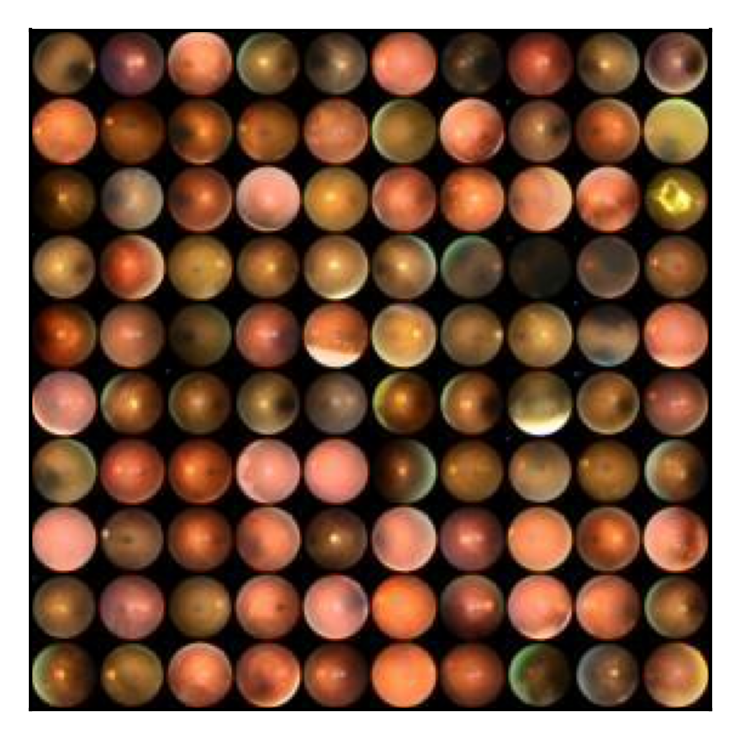

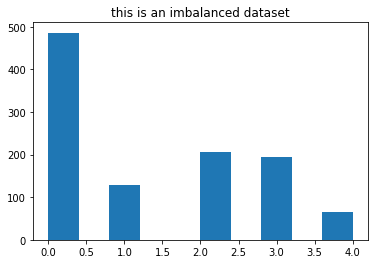

In [94]:
#################
# Homework-2
# Estimated time: 20 Minutes 
#################

# lets try medical imaging dataset, named MedMNIST
# this dataset includes different modality of the imaging data as well as different organs
# more info: https://medmnist.com/

# lets download on subset of that RetinaMNIST, and load that
!wget https://zenodo.org/record/6496656/files/retinamnist.npz
import numpy as np
retinamnist_data = np.load('retinamnist.npz') 

test_images = retinamnist_data['test_images']
test_labels = retinamnist_data['test_labels'].ravel()
train_images = retinamnist_data['train_images']
train_labels = retinamnist_data['train_labels'].ravel()
val_images = retinamnist_data['val_images']
val_labels = retinamnist_data['val_labels'].ravel()

print('==> train_images.shape: ', train_images.shape)
print('==> train_labels.shape: ', train_labels.shape)
print('==> test_images.shape: ', test_images.shape)
print('==> test_labels.shape: ', test_labels.shape)
print('==> class labels: Diabetic Retinopathy severeness', np.unique(train_labels))

# lets see some of the images
import skimage
M = skimage.util.montage(train_images[:100,:,:,:], multichannel=True)
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3), dpi=300)
plt.imshow(M)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# check that if the dataset classes are balanced
# it is an imbalanced dataset
plt.figure()
plt.hist(train_labels,)
plt.title('this is an imbalanced dataset')

In [95]:
# make the X_train, y_train,
# for simplification, we reshape each image to a single feature vector
import numpy as np
X_train = np.reshape(train_images, newshape = (train_images.shape[0], -1))
y_train = train_labels

print(X_train.shape)
# 2352 = 28*28*3

(1080, 2352)


In [96]:
# make X_test and y_test
# code here ...


In [97]:
# solution
# make X_test and y_test
# code here ...

X_test = np.reshape(test_images, newshape = (test_images.shape[0], -1))
y_test = test_labels

In [98]:
# train a 5-NN classifier and evaluate the performance over the test set
# print the report of perfromance with different metrics  
# plot the normalized confusion matrix


k=5 =>  
               precision    recall  f1-score   support

           0       0.59      0.80      0.68       174
           1       0.14      0.11      0.12        46
           2       0.29      0.22      0.25        92
           3       0.38      0.29      0.33        68
           4       0.00      0.00      0.00        20

    accuracy                           0.46       400
   macro avg       0.28      0.28      0.28       400
weighted avg       0.41      0.46      0.43       400



<Figure size 900x900 with 0 Axes>

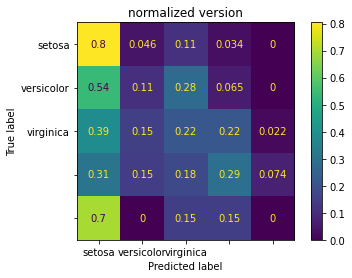

In [99]:
# solution
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier


######### k=5
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

report_metrics = classification_report(y_test, y_pred)
print('k=5 =>  \n', report_metrics)

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(3,3), dpi=300)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized,
                               display_labels = class_names, )
disp.plot()
plt.title('normalized version')
plt.show()

